Descriptive Statistics for Heart Rate:
count    1000.00
mean       70.10
std         9.54
min        50.00
25%        63.35
50%        70.33
75%        76.43
max        99.65
Name: Heart_Rate, dtype: float64


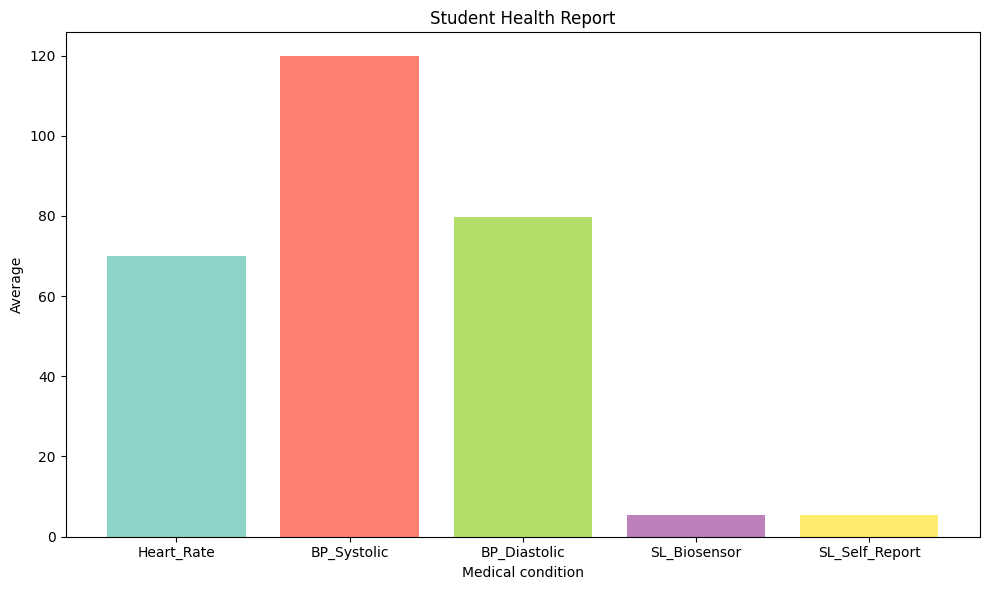

Standard Deviation of Heart Rate: 9.54
Kurtosis of Heart Rate: -0.16
Skewness of Heart Rate: 0.11
Corelation:             Heart_Rate   Age  Study_Hours
Heart_Rate         1.00  0.02         0.04
Age                0.02  1.00        -0.07
Study_Hours        0.04 -0.07         1.00


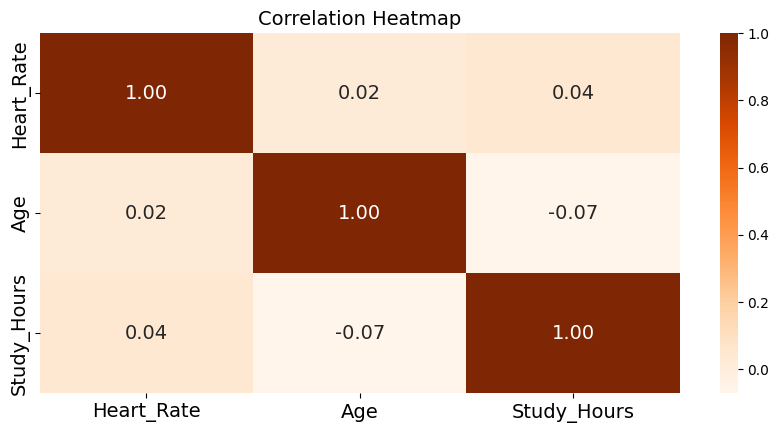

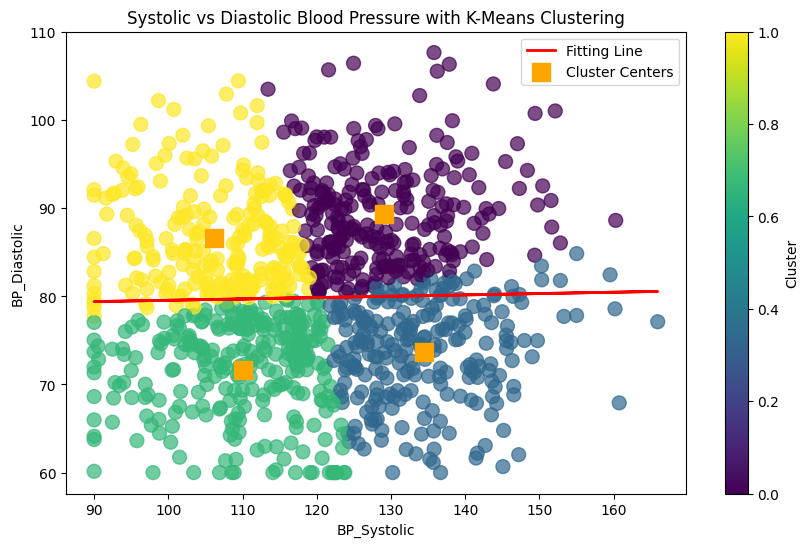

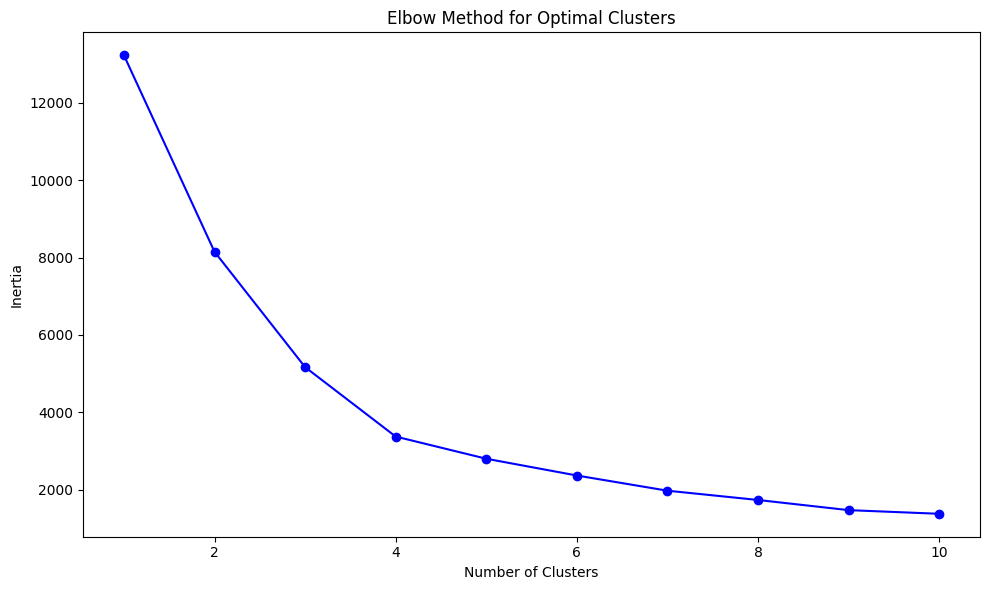

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def load_dataset():
    
        data = pd.read_csv('student_health_data.csv')
        data = data.rename(columns={
            'Blood_Pressure_Systolic': 'BP_Systolic',
            'Blood_Pressure_Diastolic': 'BP_Diastolic',
            'Stress_Level_Biosensor': 'SL_Biosensor',
            'Stress_Level_Self_Report': 'SL_Self_Report'
        })
        desc_stats = data['Heart_Rate'].describe()
        print("Descriptive Statistics for Heart Rate:")
        print(round(desc_stats,2))
        return data

def plot_bar(data):
    columns = ['Heart_Rate', 'BP_Systolic', 'BP_Diastolic', 'SL_Biosensor', 'SL_Self_Report']
    averages = data[columns].mean()
    colors = plt.cm.Set3(np.linspace(0, 1, len(columns)))
    plt.figure(figsize=(10, 6))
    plt.bar(averages.index, averages.values, color=colors)
    plt.xlabel("Medical condition")
    plt.ylabel("Average")
    plt.title("Student Health Report")
    plt.tight_layout()
    plt.show()

def clustering_scatter_method(data):
    numerical_features = ['BP_Systolic', 'BP_Diastolic']
    data_numerical = data[numerical_features].dropna()
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_numerical)
    optimal_clusters = 4  
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    data['Cluster'] = clusters
    return data, kmeans, scaler

def clustering_elbow_method(data):
    numerical_features = ['SL_Biosensor', 'SL_Self_Report']
    data_numerical = data[numerical_features].dropna()
    inertia = []
    range_clusters = range(1, 11)    
    for k in range_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data_numerical)
        inertia.append(kmeans.inertia_)
    
    return inertia, range_clusters

def fitting_method(data):
    X = data[['BP_Systolic']].values.reshape(-1, 1)
    Y = data['BP_Diastolic'].values
    regressor = LinearRegression()
    regressor.fit(X,Y)
    line_pred = regressor.predict(X)
    return line_pred

def plot_scatter(data, kmeans, scaler, line_pred):
    plt.figure(figsize=(10, 6))  
    plt.scatter(data['BP_Systolic'], data['BP_Diastolic'], c=data['Cluster'], cmap='viridis', s=100, alpha=0.7)
    plt.plot(data['BP_Systolic'], line_pred, color='red', linewidth=2, label='Fitting Line')
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=150, c='orange', marker='s', label='Cluster Centers')
    plt.title('Systolic vs Diastolic Blood Pressure with K-Means Clustering')
    plt.xlabel('BP_Systolic')
    plt.ylabel('BP_Diastolic')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.show()

def plot_heatmap(data):
    corr_matrix = data[['Heart_Rate','Age','Study_Hours']].corr()
    std_hrt_rate = data['Heart_Rate'].std() 
    kurt_hrt_rate = data['Heart_Rate'].kurtosis()
    skew_hrt_rate = data['Heart_Rate'].skew()
    print(f"Standard Deviation of Heart Rate: {round(std_hrt_rate,2)}")
    print(f"Kurtosis of Heart Rate: {round(kurt_hrt_rate,2)}")
    print(f"Skewness of Heart Rate: {round(skew_hrt_rate,2)}")
    print(f"Corelation:{round(corr_matrix,2)}")   
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='Oranges', fmt=".2f", cbar=True, annot_kws={"fontsize": 14})
    plt.title("Correlation Heatmap", fontsize=14)
    plt.xticks(fontsize=14)  
    plt.yticks(fontsize=14)
    plt.subplots_adjust(bottom=0.2, top=0.8, left=0.1, right=0.9)
    plt.show()

def elbow_plot(inertia, range_clusters):
    plt.figure(figsize=(10, 6))
    plt.plot(range_clusters, inertia, marker='o', linestyle='-', color='b')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.tight_layout()
    plt.show()

def main():
    data = load_dataset()
    plot_bar(data)
    plot_heatmap(data)
    data, kmeans, scaler = clustering_scatter_method(data)
    line_pred = fitting_method(data)
    plot_scatter(data, kmeans, scaler, line_pred)
    inertia, range_clusters = clustering_elbow_method(data)
    elbow_plot(inertia, range_clusters)

if __name__ == "__main__":
    main()
